In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data= pd.read_csv('../input/sf-salaries/Salaries.csv', sep =',',encoding ='utf-8')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
data.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [5]:
#Find the shape of data
data.shape

(148654, 13)

In [6]:
#get some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [7]:
#Overall Statistics About The Dataframe
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [8]:
 #Check Null Values In The Dataset
data.isnull().sum()

pre_missing=data.isnull().sum()*100/len(data)
pre_missing

    

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

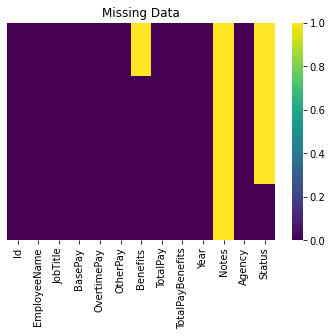

In [9]:
#drow Null Values In The Dataset
sns.heatmap(data.isnull(),cmap='viridis',cbar=True,yticklabels=False)
plt.title("Missing Data")
plt.show()


In [10]:
data.columns


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [11]:
# Drop  Notes, Agency, and Status Columns

data_drop=data.drop(columns=['Notes','Status','Agency'],axis=1)

In [12]:
data_drop.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011


In [13]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 11.3+ MB


In [14]:
data_drop['BasePay'].dtype

dtype('O')

In [15]:
data_drop[data_drop['BasePay']=="Not Provided"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


In [16]:
#Step1.Define index for the drop condion
Index_def=data_drop[data_drop['BasePay']=="Not Provided"].index

In [17]:
#Step2.dropping rows in Panda Dataframe
data2=data_drop.drop(Index_def)

In [18]:
#change data type
data2[data2['BasePay']=="Not Provided"]



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year


In [19]:
data2['BasePay']=data2['BasePay'].astype('float')

In [20]:
data2['BasePay'].dtype

dtype('float64')

In [21]:
data2.describe()

,Id,BasePay,TotalPay,TotalPayBenefits,Year
count,148650.000000,148045.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,66325.448840,74770.333901,93695.075969,2012.522603
std,42911.703176,42764.635495,50516.196009,62792.497391,1.117526
min,1.000000,-166.010000,-618.130000,-618.130000,2011.000000
25%,37163.250000,33588.200000,36169.955000,44073.337500,2012.000000
50%,74325.500000,65007.450000,71427.240000,92406.020000,2013.000000
75%,111487.750000,94691.050000,105842.960000,132877.992500,2014.000000
max,148654.000000,319275.010000,567595.430000,567595.430000,2014.000000


In [22]:
data2.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [23]:
data2['OvertimePay'].dtype

dtype('O')

In [24]:
# we will do the same to OvertimePay (change data type)
data2['OvertimePay']=data2['OvertimePay'].astype('float')
data2

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014


In [25]:
data2['OvertimePay'].dtype

dtype('float64')

In [26]:
data2.describe()

,Id,BasePay,OvertimePay,TotalPay,TotalPayBenefits,Year
count,148650.000000,148045.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,66325.448840,5066.059886,74770.333901,93695.075969,2012.522603
std,42911.703176,42764.635495,11454.380559,50516.196009,62792.497391,1.117526
min,1.000000,-166.010000,-0.010000,-618.130000,-618.130000,2011.000000
25%,37163.250000,33588.200000,0.000000,36169.955000,44073.337500,2012.000000
50%,74325.500000,65007.450000,0.000000,71427.240000,92406.020000,2013.000000
75%,111487.750000,94691.050000,4658.175000,105842.960000,132877.992500,2014.000000
max,148654.000000,319275.010000,245131.880000,567595.430000,567595.430000,2014.000000


In [27]:
#Find Occurrence of The Employee Names  (Top 10)
data2['EmployeeName'].value_counts().head(10)

Kevin Lee       13
William Wong    11
Richard Lee     11
Steven Lee      11
KEVIN LEE        9
Stanley Lee      9
John Chan        9
Michael Wong     9
DAVID WONG       8
RICHARD LEE      8
Name: EmployeeName, dtype: int64

In [28]:
data2.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [29]:
#Find The Number of Unique Job Titles
data2['JobTitle'].nunique()

2158

In [30]:
#Total Number of Job Titles Contain Captain
data2[data2['JobTitle'].str.contains('Captain',case=False)]
len(data2[data2['JobTitle'].str.contains('Captain',case=False)])


552

In [31]:
#Total Number of Job Titles Contain Manager
data2[data2['JobTitle'].str.contains('Manager',case=False)]
len(data2[data2['JobTitle'].str.contains('Manager',case=False)])

4110

In [32]:
#Display All the Employee Names From POLICE DEPARTMENT
data2.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [33]:
data2[data2['JobTitle'].str.contains('POLICE DEPARTMENT',case=False)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.3,NaN,297608.92,297608.92,2011
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778.01,73478.20,13957.65,NaN,286213.86,286213.86,2011
28,29,DENISE SCHMITT,DEPUTY CHIEF III (POLICE DEPARTMENT),261717.60,0.00,2357.0,NaN,264074.60,264074.60,2011
...,...,...,...,...,...,...,...,...,...,...
113903,113904,Theresa J San Giacomo,"Sergeant, (Police Department)",130260.00,9230.90,11258.04,41477.75,150748.94,192226.69,2014
113934,113935,Ricardo S Castillo,"Sergeant, (Police Department)",130260.01,10232.14,9797.38,41646.26,150289.53,191935.79,2014
114281,114282,Alan M Callaway,"Sergeant, (Police Department)",130260.07,4013.90,11554.05,41687.89,145828.02,187515.91,2014
114331,114332,Paris C Deshong,Lieutenant (Police Department),137370.19,379.66,6232.79,42931.34,143982.64,186913.98,2014


In [34]:
data2[data2['JobTitle'].str.contains('POLICE DEPARTMENT',case=False)]['EmployeeName']

1                  GARY JIMENEZ
2                ALBERT PARDINI
11             PATRICIA JACKSON
15              RICHARD CORRIEA
28               DENISE SCHMITT
                  ...          
113903    Theresa J San Giacomo
113934       Ricardo S Castillo
114281          Alan M Callaway
114331          Paris C Deshong
123438           John A Haggett
Name: EmployeeName, Length: 712, dtype: object

In [35]:
#Find Minimum, Maximum, and Average BasePay
data2['BasePay'].max()

319275.01

In [36]:
data2['BasePay'].min()

-166.01

In [37]:
data2['BasePay'].mean()

66325.4488404877

In [38]:
#Find Job Title of GARY JIMENEZ and How Much GARY JIMENEZ Make (Include Benefits)?

data2[data2['EmployeeName']=="GARY JIMENEZ"]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011


In [39]:
data2[data2['EmployeeName']=="GARY JIMENEZ"]['TotalPayBenefits']

1    538909.28
Name: TotalPayBenefits, dtype: float64

In [40]:
data2[data2['EmployeeName']=="GARY JIMENEZ"]['JobTitle']

1    CAPTAIN III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

In [41]:
#Display Name of The Person Having The Highest OvertimePay

data2[data2['OvertimePay'].max()==data2['OvertimePay']] 

data2[data2['OvertimePay'].max()==data2['OvertimePay']] ['EmployeeName']

1    GARY JIMENEZ
Name: EmployeeName, dtype: object

In [42]:
# Find Top 10 Most Common Jobs
data2['JobTitle'].value_counts().head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

In [43]:
#Find Average TotalPayBenefits of All Employee Per Year 
data2.groupby('Year')['TotalPayBenefits'].mean()

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100261.438668
Name: TotalPayBenefits, dtype: float64

<AxesSubplot:xlabel='Year'>

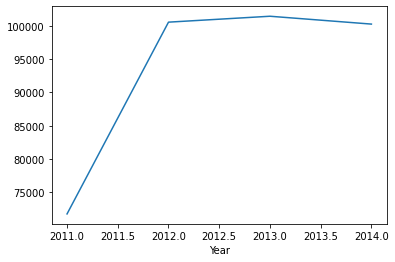

In [44]:
#darw Average TotalPayBenefits of All Employee Per Year 
df=data2.groupby('Year')['TotalPayBenefits'].mean()

df.plot()

In [45]:
#Find Average BasePay of All Employee Per JobTitle 
data2.groupby('JobTitle')['BasePay'].mean()



JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2158, dtype: float64

In [46]:
#Find Top 10 Average BasePay of All Employee Per JobTitle 
df=data2.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False).head(10)
df

JobTitle
Chief of Police                           309767.683333
Chief, Fire Department                    304232.340000
Gen Mgr, Public Trnsp Dept                297769.413333
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000000
Dep Dir for Investments, Ret              276153.765000
Mayor                                     275852.530000
Adm, SFGH Medical Center                  265218.780000
EXECUTIVE CONTRACT EMPLOYEE               264452.520000
Controller                                263588.753333
Dept Head V                               259590.712222
Name: BasePay, dtype: float64

<AxesSubplot:xlabel='JobTitle'>

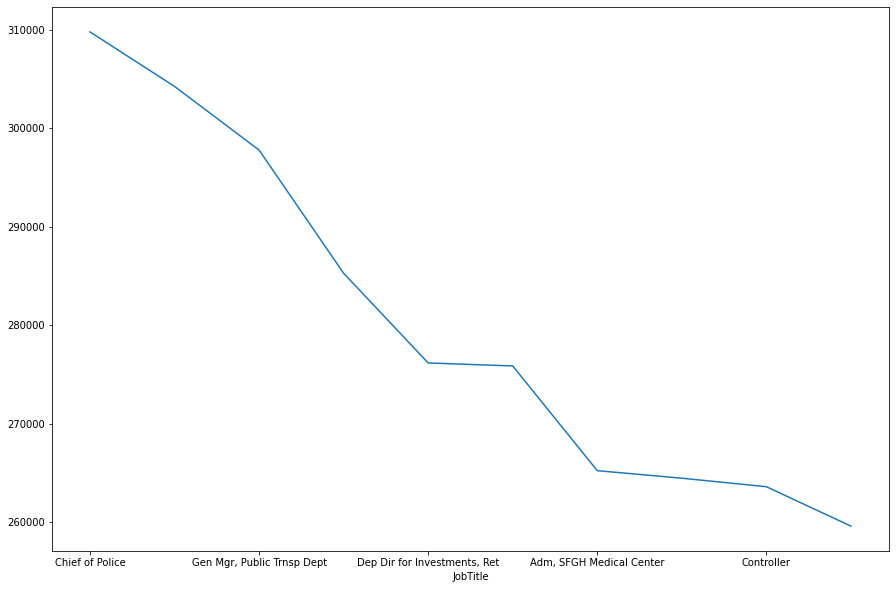

In [47]:
plt.figure(figsize=(15,10))
df.plot()

In [48]:
#Find Average BasePay of Employee Having Job Title Controller  
data2[data2['JobTitle']=="Controller"]['BasePay'].mean()


263588.75333333336